# 1. Exploratory Data Analysis (EDA)

**Objective:** In this notebook, we perform an initial analysis of the dataset. We explore the distribution of the target variable (age), check for data quality issues, and visualize audio features to gain insights that will inform our modeling strategy.

## 1.1. Setup and Library Imports

Let's start by importing the necessary libraries for data manipulation, analysis, and visualization. We'll primarily use `pandas` for data handling, `numpy` for numerical operations, and `seaborn` / `matplotlib` for plotting.

In [26]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

import librosa
import librosa.display


## 1.2. Data Loading and Initial Inspection

We load the `development.csv` file into a pandas DataFrame. We'll then perform an initial inspection to understand its shape, data types, and check for any missing values. We'll use `.head()`, `.info()`, and `.describe()` for a quick overview.

In [27]:
DEVELOPMENT_PATH = Path("../data/development.csv")

if DEVELOPMENT_PATH.exists():
    dev_df = pd.read_csv(DEVELOPMENT_PATH, index_col=0)
else:
    print(f"Errore: File non trovato al percorso {DEVELOPMENT_PATH}")
    # Initialize an empty DataFrame
    dev_df = pd.DataFrame()

In [28]:
dev_df.head()

,sampling_rate,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
Id,,,,,,,,,,,,,,,,,,,
0,22050,24.0,female,arabic,1821.6906,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,22050,22.5,female,hungarian,1297.8187,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,22050,22.0,female,portuguese,1332.8524,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,22050,22.0,female,english,1430.3499,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,22050,22.0,male,dutch,1688.7234,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav


In [29]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sampling_rate           2933 non-null   int64  
 1   age                     2933 non-null   float64
 2   gender                  2933 non-null   object 
 3   ethnicity               2933 non-null   object 
 4   mean_pitch              2933 non-null   float64
 5   max_pitch               2933 non-null   float64
 6   min_pitch               2933 non-null   float64
 7   jitter                  2933 non-null   float64
 8   shimmer                 2933 non-null   float64
 9   energy                  2933 non-null   float64
 10  zcr_mean                2933 non-null   float64
 11  spectral_centroid_mean  2933 non-null   float64
 12  tempo                   2933 non-null   object 
 13  hnr                     2933 non-null   float64
 14  num_words               2933 non-null   int64

In [30]:
dev_df.describe()

,sampling_rate,age,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,hnr,num_words,num_characters,num_pauses,silence_duration
count,2933.0,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,22050.0,27.897886,1189.536569,3779.570485,146.934930,0.021190,0.107741,0.005208,0.104774,2176.369847,-74.526288,41.307535,167.936243,12.423116,13.501159
std,0.0,13.093316,414.193673,532.847869,3.757917,0.006626,0.029005,0.006074,0.051646,578.925294,38.446856,32.782431,133.816974,14.273205,10.839142
min,22050.0,6.000000,346.974330,935.515560,145.349140,0.007292,0.045205,0.000028,0.015947,692.116731,-193.693345,0.000000,0.000000,1.000000,0.668345
25%,22050.0,19.000000,818.922360,3948.234400,145.419140,0.016734,0.087378,0.001960,0.060733,1740.756716,-104.555692,4.000000,14.000000,1.000000,1.732925
50%,22050.0,23.000000,1208.998300,3998.397200,145.622010,0.020525,0.104697,0.003716,0.098964,2150.814043,-84.415550,69.000000,281.000000,8.000000,17.368526
75%,22050.0,32.000000,1523.777700,3999.485400,146.820890,0.024558,0.124993,0.006338,0.139559,2566.190670,-40.339359,69.000000,281.000000,20.000000,21.408798
max,22050.0,97.000000,2724.892800,3999.792500,202.040700,0.096153,0.265167,0.129114,0.335976,4144.132595,12.403661,69.000000,281.000000,97.000000,83.777596


## 1.3. Target Variable Analysis: `age`

The core of our regression task is the `age` variable. We need to understand its distribution to see the demographic spread of the speakers. A histogram or a Kernel Density Estimate (KDE) plot will help us visualize this and check for any skewness or multi-modal patterns.

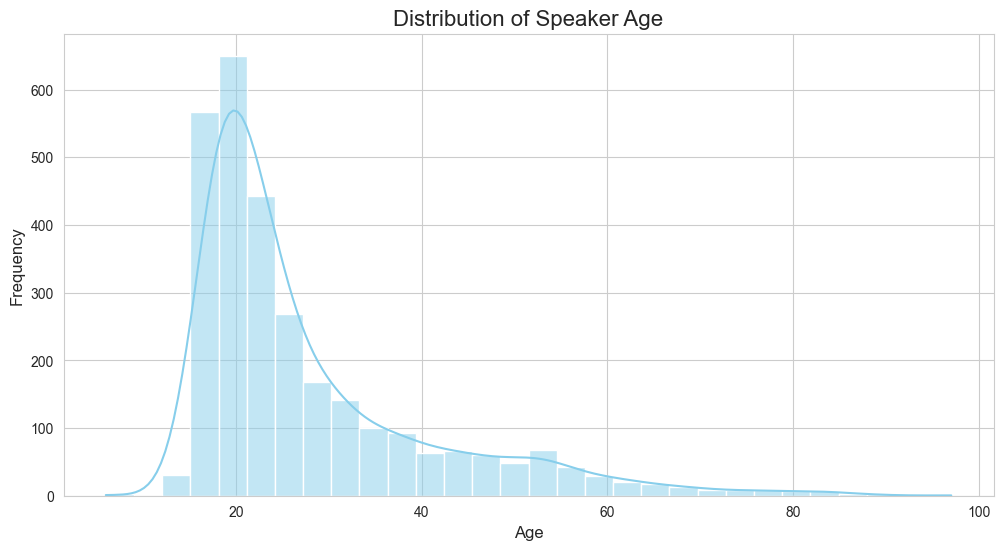

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(dev_df['age'], kde=True, bins=30, color='skyblue')

plt.title('Distribution of Speaker Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

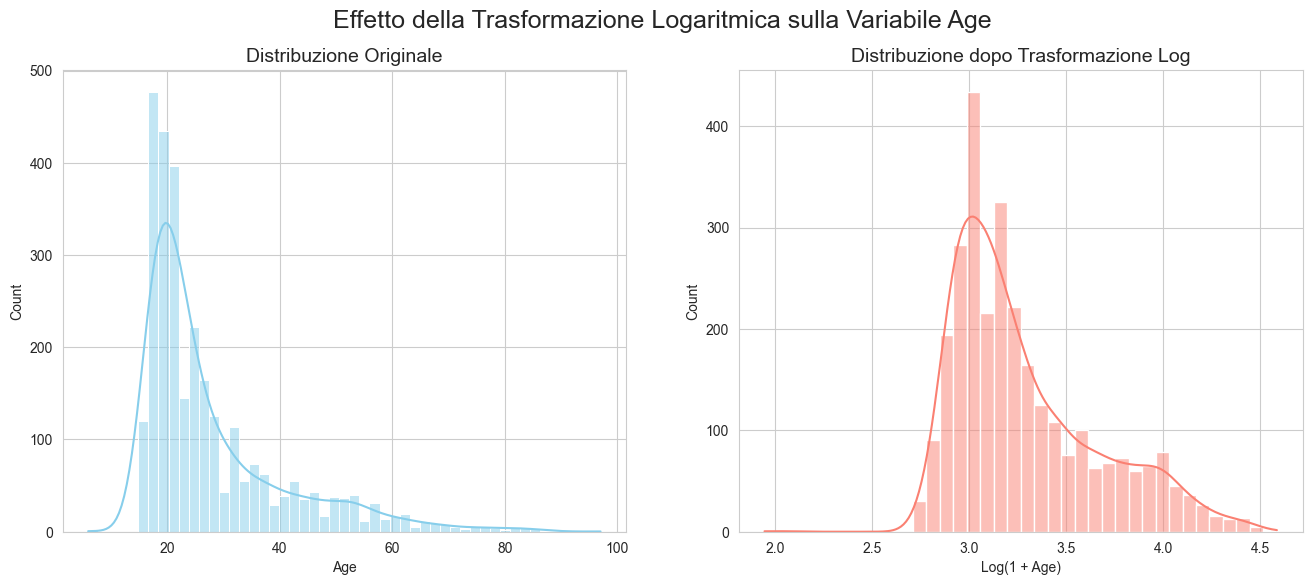

In [32]:
dev_df['age_log'] = np.log1p(dev_df['age'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

fig.suptitle('Effetto della Trasformazione Logaritmica sulla Variabile Age', fontsize=18)

sns.histplot(dev_df['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuzione Originale', fontsize=14)
axes[0].set_xlabel('Age')

sns.histplot(dev_df['age_log'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribuzione dopo Trasformazione Log', fontsize=14)
axes[1].set_xlabel('Log(1 + Age)')

plt.show()

## 1.4. Categorical Feature Analysis

In this section, we analyze the categorical features: `gender` and `ethnicity`. We will use count plots to visualize their distributions and check for any significant class imbalance, which might influence the model's behavior.

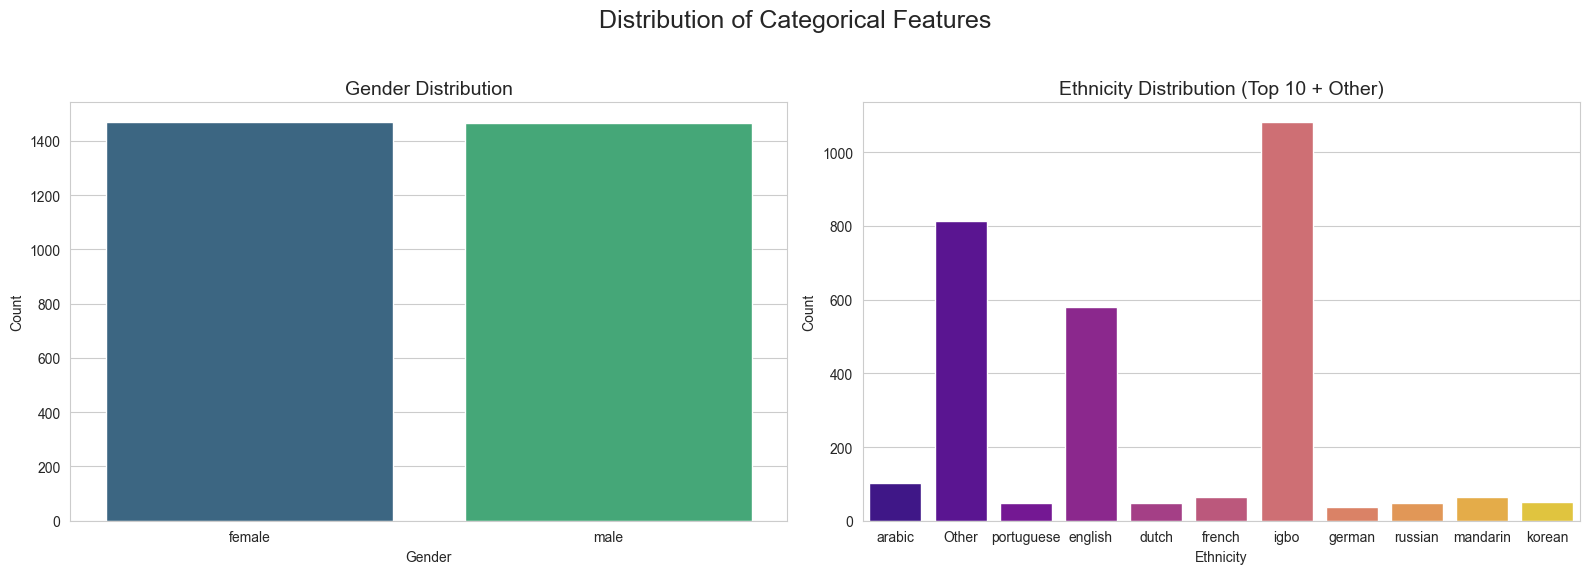

--- Value Counts ---

Gender:
gender
female    1468
male      1465
Name: count, dtype: int64

Ethnicity:
ethnicity_grouped
igbo          1081
Other          812
english        579
arabic         102
mandarin        65
french          63
korean          52
portuguese      48
russian         48
dutch           47
german          36
Name: count, dtype: int64


In [33]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('Distribution of Categorical Features', fontsize=18)

sns.countplot(x='gender', data=dev_df, ax=axes[0], palette='viridis', hue='gender', legend=False)
axes[0].set_title('Gender Distribution', fontsize=14)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')


top_10_ethnicities = dev_df['ethnicity'].value_counts().nlargest(10).index
dev_df['ethnicity_grouped'] = np.where(dev_df['ethnicity'].isin(top_10_ethnicities), dev_df['ethnicity'], 'Other')

sns.countplot(x='ethnicity_grouped', data=dev_df, ax=axes[1], palette='plasma', hue='ethnicity_grouped', legend=False)
axes[1].set_title('Ethnicity Distribution (Top 10 + Other)', fontsize=14)
axes[1].set_xlabel('Ethnicity')
axes[1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

print("--- Value Counts ---")
print("\nGender:")
print(dev_df['gender'].value_counts())
print("\nEthnicity:")
print(dev_df['ethnicity_grouped'].value_counts())

## 1.5. Numerical Feature Analysis

We will now explore the pre-extracted numerical features (e.g., `mean_pitch`, `jitter`, `shimmer`). Our goals are:
1.  **Visualize Distributions:** Use histograms and box plots to understand the spread and identify potential outliers for each feature.
2.  **Check for Correlations:** Create a correlation matrix heatmap to see how features relate to each other and, more importantly, how they correlate with our target variable, `age`.

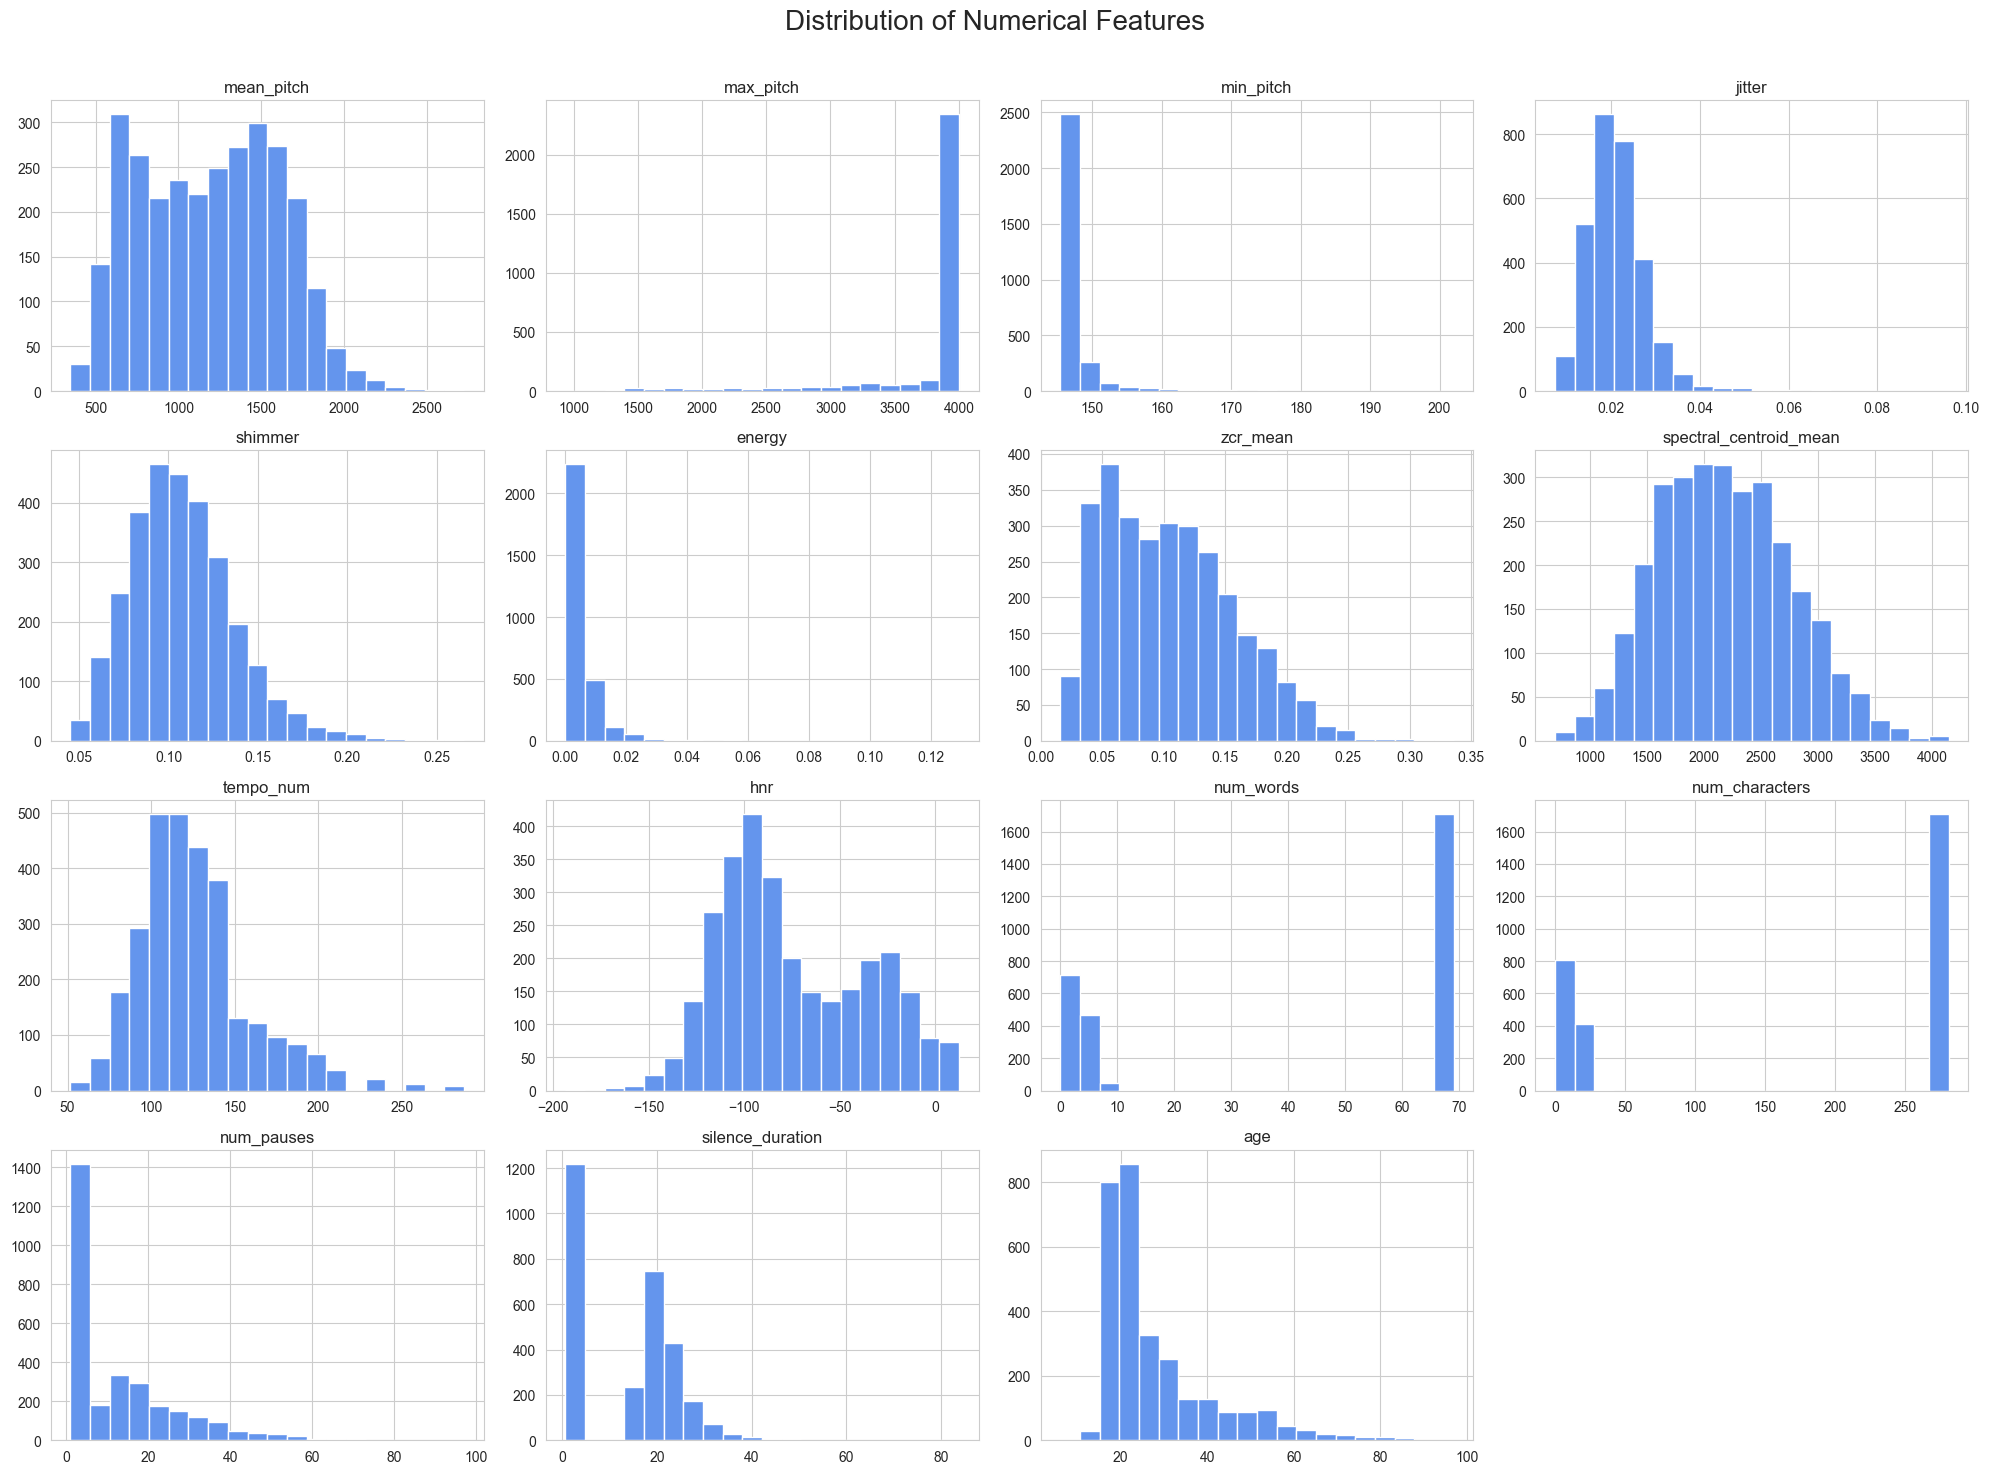

In [ ]:
dev_df['tempo_num'] = pd.to_numeric(dev_df['tempo'].str.strip('[]'), errors='coerce')

numerical_features = [
    'mean_pitch', 'max_pitch', 'min_pitch', 'jitter', 'shimmer',
    'energy', 'zcr_mean', 'spectral_centroid_mean', 'tempo_num', 'hnr',
    'num_words', 'num_characters', 'num_pauses', 'silence_duration', 'age'
]
df_numerical = dev_df[numerical_features]

df_numerical.hist(bins=20, figsize=(20, 15), color='cornflowerblue')
plt.suptitle('Distribution of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

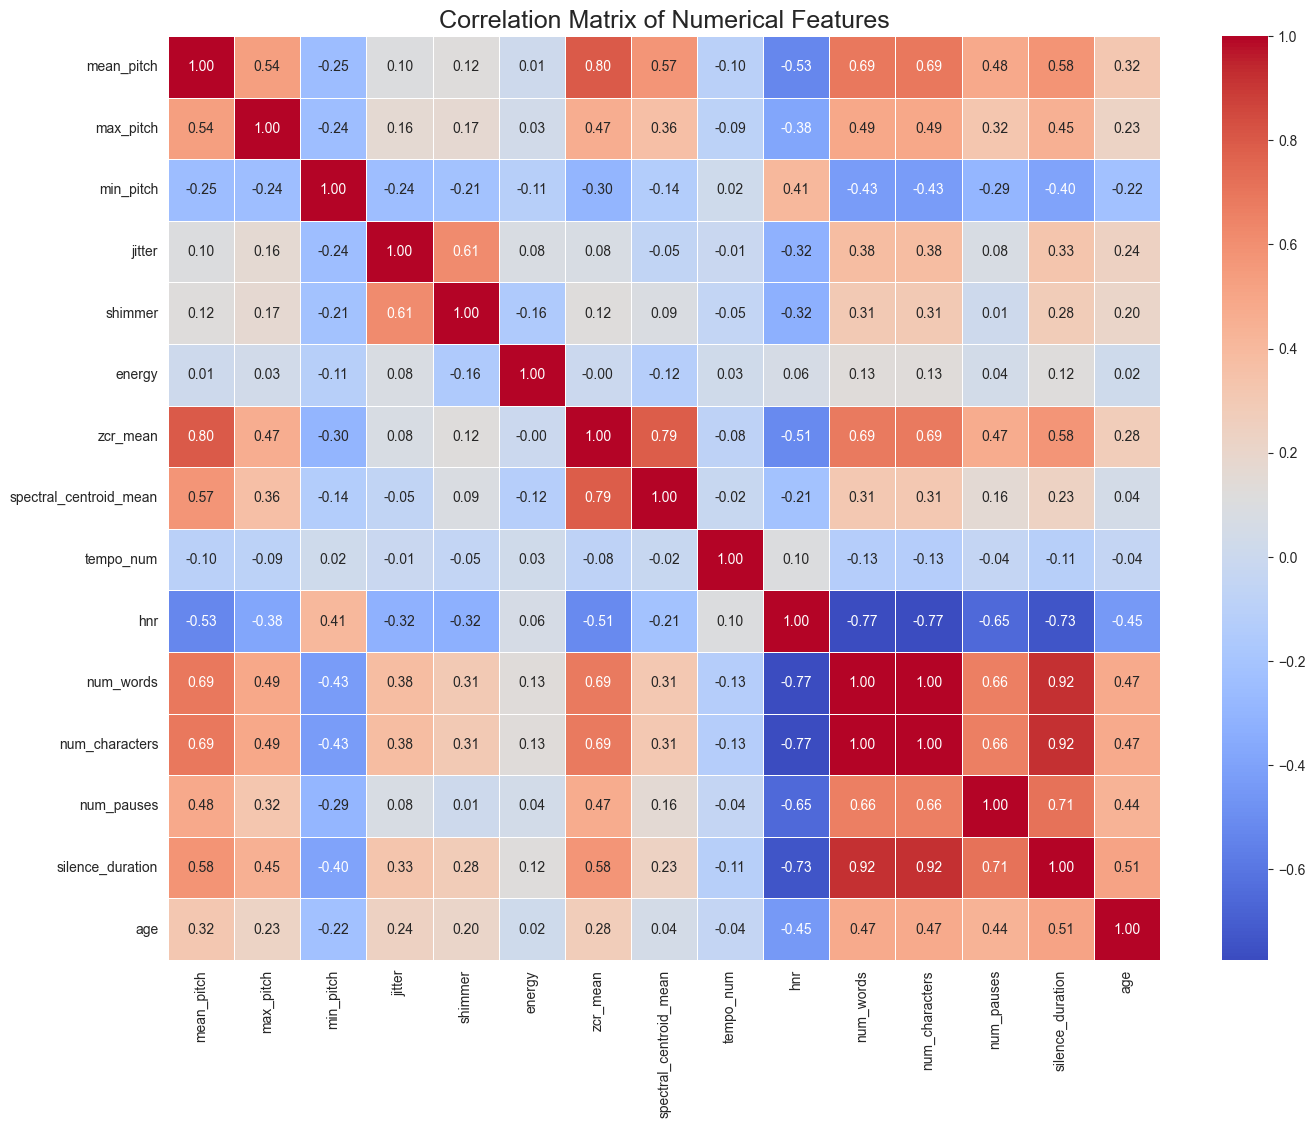

In [ ]:
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap='coolwarm',     
    fmt='.2f',           
    linewidths=.5
)
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.show()

Text(0.5, 0, 'HNR (Harmonic-to-Noise Ratio)')

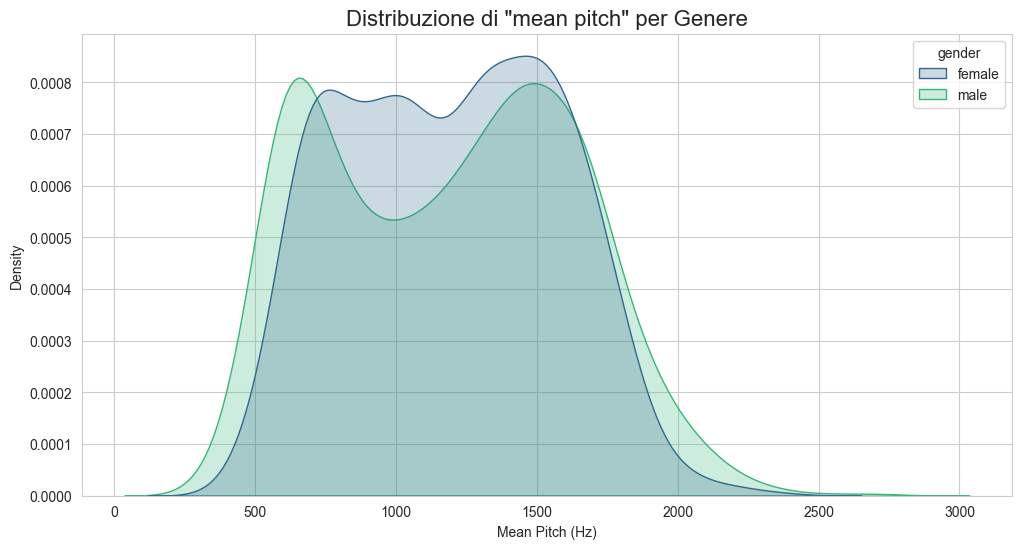

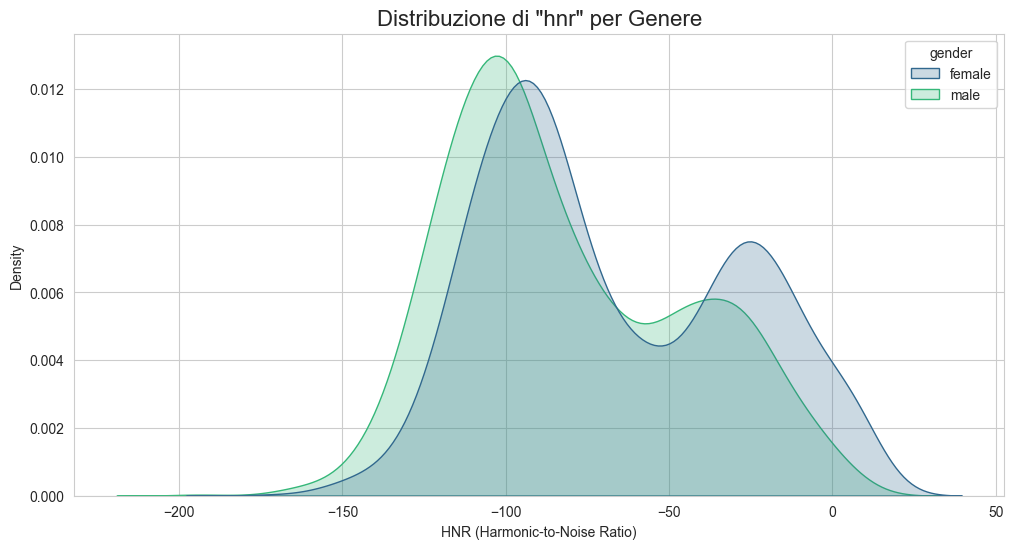

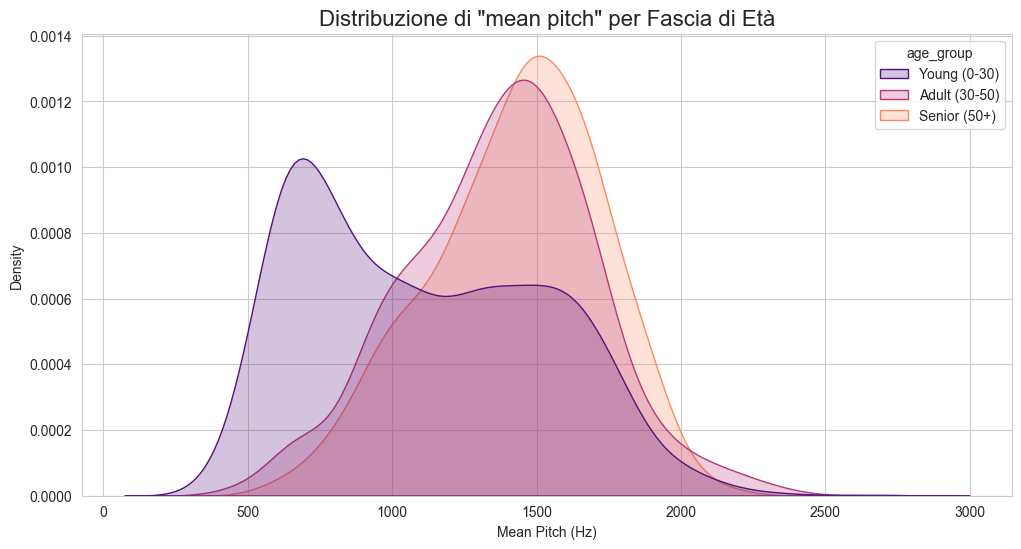

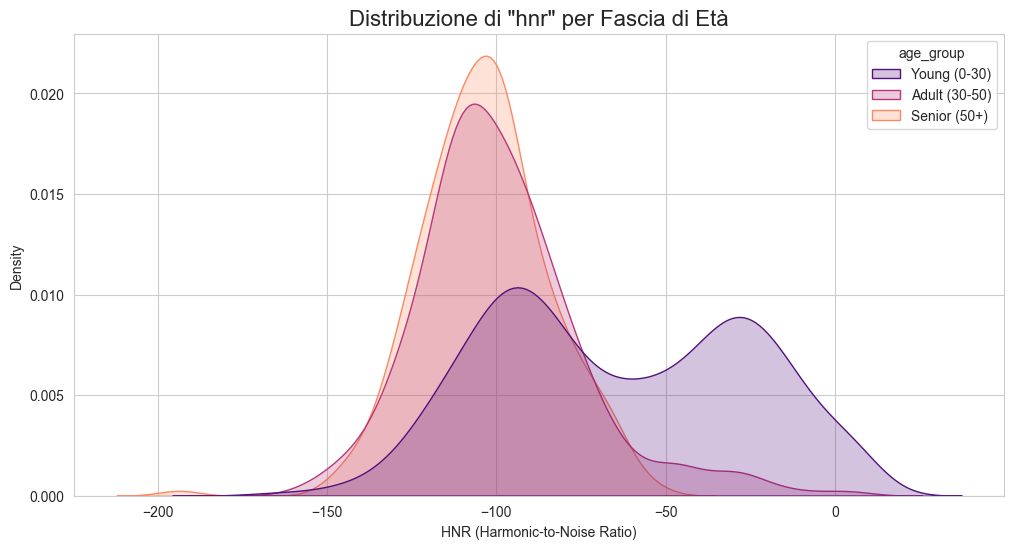

In [36]:
sns.set_style("whitegrid")

# Analisi di 'mean pitch' per Genere
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dev_df, x='mean_pitch', hue='gender', fill=True, palette='viridis', common_norm=False)
plt.title('Distribuzione di "mean pitch" per Genere', fontsize=16)
plt.xlabel('Mean Pitch (Hz)')

# Analisi di 'hnr' per Genere
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dev_df, x='hnr', hue='gender', fill=True, palette='viridis', common_norm=False)
plt.title('Distribuzione di "hnr" per Genere', fontsize=16)
plt.xlabel('HNR (Harmonic-to-Noise Ratio)')

# Creazione fasce di età
bins = [0, 30, 50, 100]
labels = ['Young (0-30)', 'Adult (30-50)', 'Senior (50+)']
dev_df['age_group'] = pd.cut(dev_df['age'], bins=bins, labels=labels, right=False)

# Analisi di 'mean pitch' per Fascia di Età
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dev_df, x='mean_pitch', hue='age_group', fill=True, palette='magma', common_norm=False)
plt.title('Distribuzione di "mean pitch" per Fascia di Età', fontsize=16)
plt.xlabel('Mean Pitch (Hz)')

# Analisi di 'hnr' per Fascia di Età
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dev_df, x='hnr', hue='age_group', fill=True, palette='magma', common_norm=False)
plt.title('Distribuzione di "hnr" per Fascia di Età', fontsize=16)
plt.xlabel('HNR (Harmonic-to-Noise Ratio)')

## 1.6. Audio Data Quick Dive (Optional)

While we have pre-extracted features, it's useful to get a "feel" for the raw data. In this optional section, we'll randomly select a few audio files, load them with `librosa`, and visualize their waveform and spectrogram. This can provide qualitative insights that numbers alone might miss.

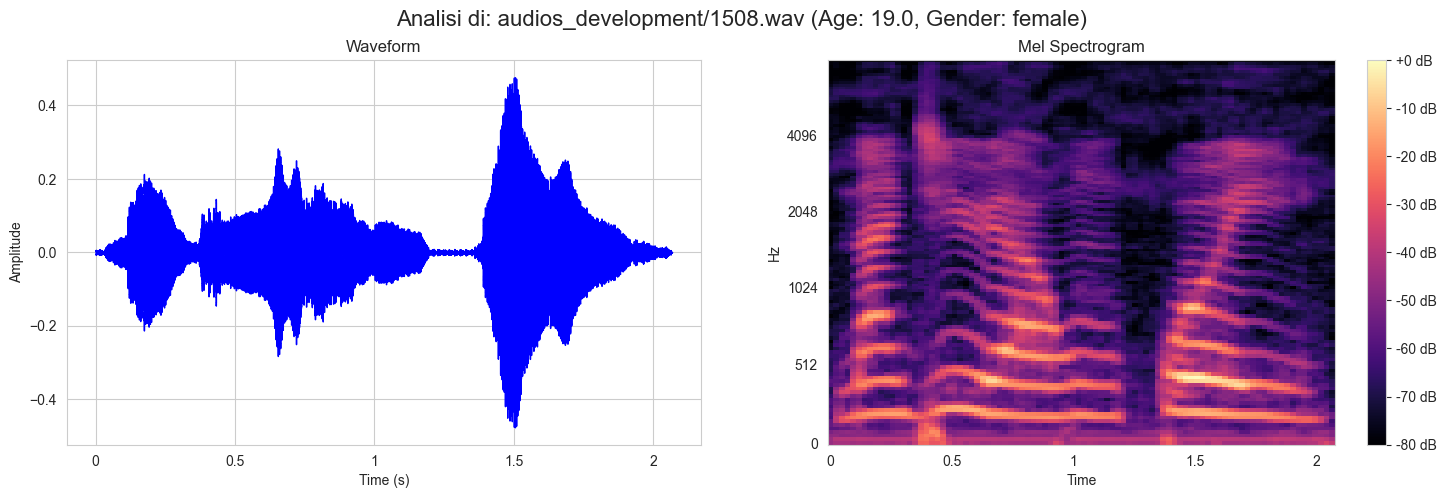

In [37]:
AUDIO_DIR = Path("../data")
NUMBER_OF_SAMPLES = 1

if not AUDIO_DIR.exists():
    print(f"ATTENZIONE: La cartella audio '{AUDIO_DIR}' non è stata trovata.")
    print("Sarà impossibile caricare i file audio. Assicurati che il percorso sia corretto.")
else:
    sample_files = dev_df.sample(NUMBER_OF_SAMPLES)

    for index, row in sample_files.iterrows():
        file_path = AUDIO_DIR / row['path']
        age = row['age']
        gender = row['gender']

        try:
            y, sr = librosa.load(file_path)

            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)

            fig, axes = plt.subplots(1, 2, figsize=(18, 5))
            fig.suptitle(f'Analisi di: {row["path"]} (Age: {age}, Gender: {gender})', fontsize=16)

            librosa.display.waveshow(y, sr=sr, ax=axes[0], color='blue')
            axes[0].set_title('Waveform')
            axes[0].set_xlabel('Time (s)')
            axes[0].set_ylabel('Amplitude')

            img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', ax=axes[1], fmax=8000)
            fig.colorbar(img, ax=axes[1], format='%+2.0f dB')
            axes[1].set_title('Mel Spectrogram')

            plt.show()

        except Exception as e:
            print(f"Errore durante il caricamento o la visualizzazione del file {file_path}: {e}")


## 1.7. Summary of Findings

Here we summarize the key takeaways from our analysis. This section will highlight the most important insights, such as significant correlations, data imbalances, or feature characteristics that will directly guide the design of our `AudioFeatureExtractor` and the modeling pipeline in the next steps.

### Key Insights from Data Exploration

* **Target Variable (`age`)**: The distribution of the target variable is heavily **right-skewed**, with a majority of speakers in the younger age range. This requires a transformation to help most models perform optimally.
* **Categorical Features**:
    * `gender`: The dataset is almost perfectly balanced between male and female speakers.
    * `ethnicity`: This feature has very high cardinality, with many categories containing only a few samples. This makes it problematic for both visualization and direct use in modeling.
* **Numerical Features**: Many of the pre-extracted numerical features also exhibit strong skewness (e.g., `jitter`, `shimmer`, `energy`). `mean pitch` and `hnr` show bimodal (two-peaked) distributions.
* **Feature Relationships**:
    * **Bimodality Source**: The two peaks in `mean pitch` are almost entirely explained by `gender`, which is a critical insight. The cause of the `hnr` bimodality remains unclear from the available data.
    * **Correlations**: The strongest linear correlations with `age` are found in `hnr` (positive) and the `pitch`-related features (negative).
    * **Multicollinearity**: There is high redundancy between certain features, most notably `num_words` and `num_characters` (correlation of 0.97).

### Task Characteristics and Strategy

* #### Supervision Type
    The task is a classic **supervised learning** problem, as we are provided with a development set containing labeled data (the `age` column). Specifically, it is a **regression** task, since the goal is to predict a continuous numerical value.

* #### Data Distribution and Imbalance
    The primary imbalance is not in the classes but in the distribution of the target variable and features.
    * **Target Skew**: To address the right-skew of the `age` variable, a **logarithmic transformation (`np.log1p`)** will be applied. This will help models that perform better with normally distributed data.
    * **Feature Cardinality**: To handle the high number of rare categories in `ethnicity`, we will use a **grouping (lumping)** technique, collapsing the least frequent categories into a single "Other" class.

* #### Dataset Size and Validation Strategy
    The development set contains 2,933 samples. This is a moderately-sized dataset, making it crucial to use the data efficiently and get a robust estimate of model performance. Instead of a simple train-validation split, a **K-Fold Cross-Validation** strategy is recommended. This approach ensures that every sample is used for both training and validation, leading to a more reliable evaluation. The final model will then be tested on the provided `evaluation.csv`.

### Proposed Preprocessing Pipeline

Based on the analysis, the following preprocessing steps will be integrated into a `scikit-learn` pipeline to ensure consistency and prevent data leakage:

1.  **Data Cleaning**: The `tempo` column will be converted to a numeric type by stripping bracket characters. Any leading/trailing whitespace from all column names will be removed.
2.  **Feature Engineering**: The `ethnicity` feature will be transformed by grouping rare categories.
3.  **Feature Selection**: To reduce redundancy, one of the highly correlated features, `num_characters`, will be dropped from the dataset.
4.  **Target Transformation**: The target variable `age` will be transformed using a log function. The inverse transformation will be applied to the final predictions.
5.  **Encoding & Scaling**:
    * **Categorical Features**: `gender` and the new `ethnicity_grouped` will be encoded using **One-Hot Encoding**.
    * **Numerical Features**: All numerical features will be scaled using **`StandardScaler`**. This is a critical step that standardizes features to have a mean of 0 and a standard deviation of 1, making them suitable for any type of model (linear, distance-based, etc.).